In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.style.use("seaborn")
%matplotlib inline

In [7]:
r = {
    'nn - 2 body - same mass': [0.48718450329195334, 0.5702250433965922, 1.5599819009454432],
    'gb - 2 body - same mass': [0.03198208649896947, 0.14615514408441144, 0.6280126451762782],
    'gb - 3 body - same mass': [0.04188334984284575, 0.2530156393751767, 1.3504504465683127],
    'gb - 3 body - diff mass': [0.1136007140203839, 0.43034650674835967, 2.450412875215651],
    'gb - 2 body - same mass - optimized': [0.004881923709180418, 0.04299154917672209, 0.282050401885859],
    'gb - 3 body - same mass - optimized': [0.015277748587549976, 0.12463087650801724, 0.8064529040568457],
}

v = {
    'nn - 2 body - same mass': [0.8255023558412633, 0.8308453961088554, 0.8100902337759422],
    'gb - 2 body - same mass': [0.300579637723342, 0.5630396941670982, 0.7211615388886904],
    'gb - 3 body - same mass': [0.6238610056241741, 0.9424990659730773, 1.097264555619048],
    'gb - 3 body - diff mass': [1.2760871537216776, 1.7376604816844348, 1.8638876745654425],
    'gb - 2 body - same mass - optimized': [0.1391346778969551, 0.25087248665547307, 0.39859631241614507],
    'gb - 3 body - same mass - optimized': [0.301126330393731, 0.6065069271284586, 0.765203535878554],
}

r_df = pd.DataFrame(r, index=['10','100','1000'])
v_df = pd.DataFrame(v, index=['10','100','1000'])

In [8]:
r_df

,nn - 2 body - same mass,gb - 2 body - same mass,gb - 3 body - same mass,gb - 3 body - diff mass,gb - 2 body - same mass - optimized,gb - 3 body - same mass - optimized
10,0.487185,0.031982,0.041883,0.113601,0.004882,0.015278
100,0.570225,0.146155,0.253016,0.430347,0.042992,0.124631
1000,1.559982,0.628013,1.350450,2.450413,0.282050,0.806453


In [9]:
v_df

,nn - 2 body - same mass,gb - 2 body - same mass,gb - 3 body - same mass,gb - 3 body - diff mass,gb - 2 body - same mass - optimized,gb - 3 body - same mass - optimized
10,0.825502,0.300580,0.623861,1.276087,0.139135,0.301126
100,0.830845,0.563040,0.942499,1.737660,0.250872,0.606507
1000,0.810090,0.721162,1.097265,1.863888,0.398596,0.765204


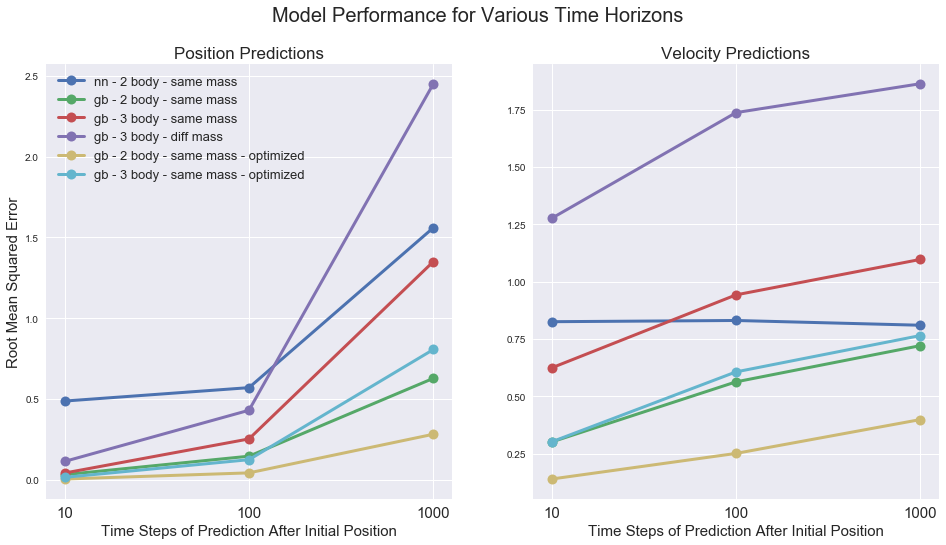

In [10]:
fig, ax = plt.subplots(1,2,figsize=(16,8))

for col in r_df.columns:
    ax[0].plot(r_df[col].index, r_df[col].values, lw=3, marker='o', ms=10, label=col)
    ax[1].plot(v_df[col].index, v_df[col].values, lw=3, marker='o', ms=10, label=col)

ax[0].legend(fontsize=13)
# ax[1].legend(fontsize=10)
ax[0].set_title('Position Predictions', fontsize=17)
ax[1].set_title('Velocity Predictions', fontsize=17)
fig.suptitle('Model Performance for Various Time Horizons', fontsize=20)
ax[0].set_xlabel('Time Steps of Prediction After Initial Position', fontsize=15)
ax[1].set_xlabel('Time Steps of Prediction After Initial Position', fontsize=15)
ax[0].set_ylabel('Root Mean Squared Error', fontsize=15)
# ax[1].set_ylabel('Root Mean Squared Error', fontsize=15)

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

fig.savefig('../images/model_perf.png', bbox_inches='tight')